# **Data Visualization**

## Objectives
* Read the cleaned data and visualize it in order to understand trends, correlations, and to understand which variables influence price.

## Inputs
* The file uses `CarPrice_cleaned.csv` located in `data\cleaned` folder.

## Outputs
* This notebook generates various plots and relies on `matplotlib`, `seaborn` and `plotly` to generate them

## Load the libraries and the data
In this section relevant data analysis libraries and the raw data will be loaded.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

The data will be loaded as the variable `df`:

In [55]:
df = pd.read_csv("../data/cleaned/CarPrice_cleaned.csv")
print(df.shape)
df.head()

(205, 27)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,injection,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,injection,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,injection,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,injection,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,injection,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Overview of the price data distribution
This section will provide a brief overview of the price distribution. Let's first look at the summary statistics for price:

In [56]:
df['price'].describe().round(1)

count      205.0
mean     13276.7
std       7988.9
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
max      45400.0
Name: price, dtype: float64

This data will be easier to visualize when presented as a box plot and a swarm plot:

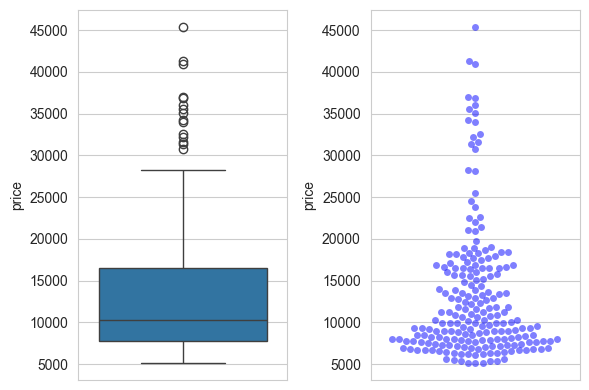

In [57]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 4))
sns.boxplot(y='price', data=df, ax=ax[0])
sns.swarmplot(y='price', data=df, ax=ax[1], color='blue', alpha=0.5)
plt.tight_layout()
plt.show()

Here we can clearly see that the majority of car prices are concentrated at the lower end of the price range, with a significant number of outliers in the higher price range. These are likely more premium car models.

Next we will take a closer look at the price distribution with the kde plot overlayed over the histogram:

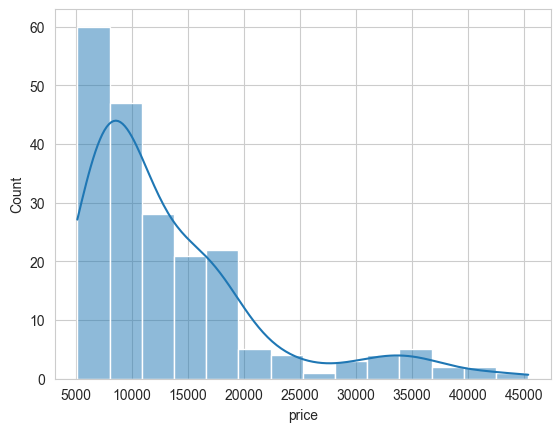

In [58]:
sns.histplot(data=df, x='price', kde=True)
plt.show()

Here we can see that the data shows a kind of mix between right skewed and bimodal data, with the second mode having clearly less objects. As expected most of the prices are concentrated in $5,000 - $20,000 range, with some significant outliers.

## Categorical variables and average price

### Analysis of Technical and Mechanical Categorical Variables
Below I will present several bar charts, each showing the relationship between a categorical variable and the average car price in dolars for each category:

In [59]:
# Import the necessary Plotly modules: graph_objects for creating plots, and make_subplots for arranging multiple plots in a grid.
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of variables to plot
cat_vars = ['fueltype', 'aspiration', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Create subplot grid: 2 rows, 3 columns
fig = make_subplots(rows=2, cols=3, subplot_titles=cat_vars)

# Loop through each categorical variable, calculate average price, and add a bar plot to the corresponding subplot
for i, var in enumerate(cat_vars):
    avg_price = df.groupby(var)['price'].mean().sort_values()
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(
        go.Bar(x=avg_price.index, y=avg_price.values, name=var),
        row=row, col=col
    )

# Set the overall figure size, adds a main title, and hide the legend (since each subplot is self-explanatory).
fig.update_layout(
    height=600, width=1000,
    title_text="Average Car Price by Technical and Mechanical Features",
    showlegend=False
)
fig.show()

From this we can see following definite concusions:
- **diesel** cars are more expensive.
- **turbo** aspiration is more expensive because it results in more power.
- surprisingly, cars with **rear-wheel drive** are the most expensive, as oposed to the expected four-wheel drive
- cars with engines located in the **rear** of the car are more expensive
- **dohc**, or dual overhead cam engines are most expensive, probably because it is a newer technology which is more efficient than the classic ohc.
- **fuel injection** fuelsystems are more expensive, probably because it is also a newer, more efficient technology, especially in the case of the majority of cars which use mpfi (Multi-Port Fuel Injection; see data cleaning notebook for details)

### Car body and average price
There is an assumption that the body type of a car will have a significant influence on its price:

In [60]:
carbody = df.groupby('carbody').agg(count=('carbody', 'size'), avg_price=('price', 'mean')).reset_index()
carbody

,carbody,count,avg_price
0,convertible,6,21890.500000
1,hardtop,8,22208.500000
2,hatchback,70,10376.652386
3,sedan,96,14344.270833
4,wagon,25,12371.960000


Here's the summary of that data in a bar chart:

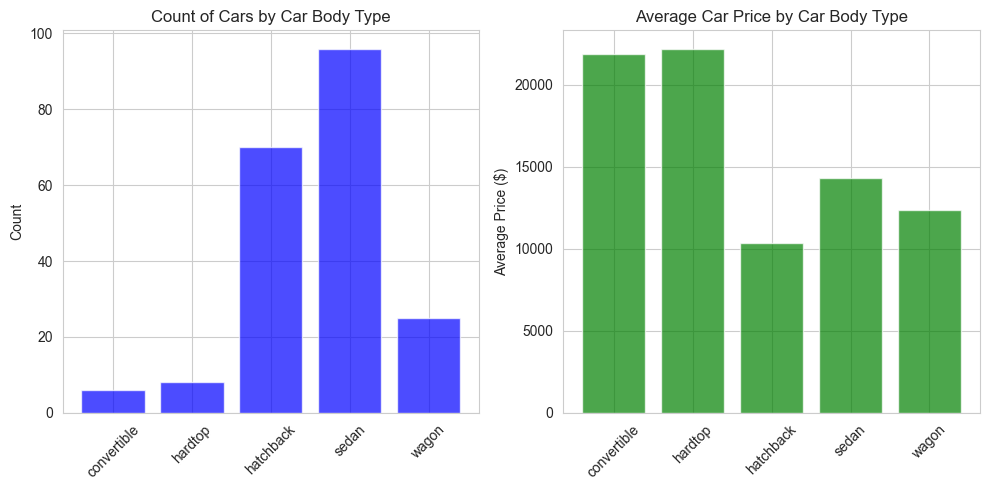

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].bar(x=carbody['carbody'], height=carbody['count'], color='blue', alpha=0.7)
ax[0].set_ylabel('Count')
ax[0].set_title('Count of Cars by Car Body Type')
ax[0].tick_params(axis='x', rotation=45) # it rotates the names making them more readable

ax[1].bar(x=carbody['carbody'], height=carbody['avg_price'], color='green', alpha=0.7)
ax[1].set_ylabel('Average Price ($)')
ax[1].set_title('Average Car Price by Car Body Type')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

This clearly shows that convertible and hardtop cars are the most expensive body types. However they are also quite uncommon, which might suggest that they only fill a small niche within the market.

### Car brand and average price
Here we will construct a DataFrame that groups different car models by brand and averages their prices:

In [62]:
brand = df.groupby('brand').agg(count=('brand', 'size'), avg_price=('price', 'mean')).reset_index()
brand

,brand,count,avg_price
0,alfa-romero,3,15498.333333
1,audi,7,17859.166714
2,bmw,8,26118.750000
3,buick,8,33647.000000
4,chevrolet,3,6007.000000
5,dodge,9,7875.444444
6,honda,13,8184.692308
7,isuzu,4,8916.500000
8,jaguar,3,34600.000000
9,mazda,17,10652.882353


Here is the summary of this data in a bar chart:

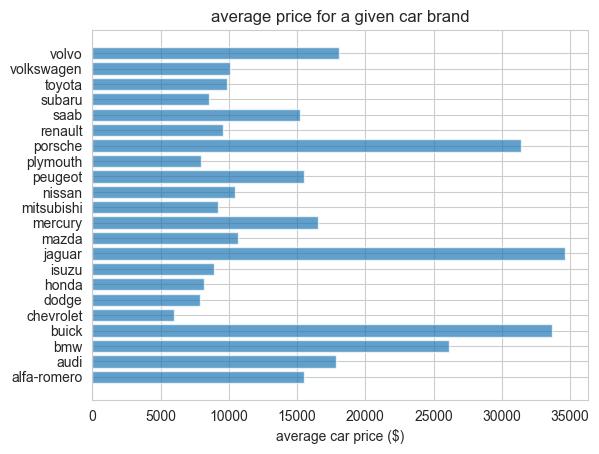

In [63]:
plt.barh(y=brand['brand'], width=brand['avg_price'], alpha=0.7)
plt.xlabel("average car price ($)")
plt.title("average price for a given car brand")
plt.grid(True) 
plt.show()

We can clearly see that some brands (Porche, Jaguar and Buick) stand out due to their luxury status. We can however see another outlier, BMW. It would be a good idea to look at their marketing strategy and their product repertoire to see what stands out in these 4 brands.

## Correlation analysis
In this section I will focus on continuous numerical values and their relation to price

### Holistic look at the engine properties
I believe that there is a correlation between engine size and the horse power. To confirm it let's look at the pair plot of `enginesize`, `horsepower` and `price`.

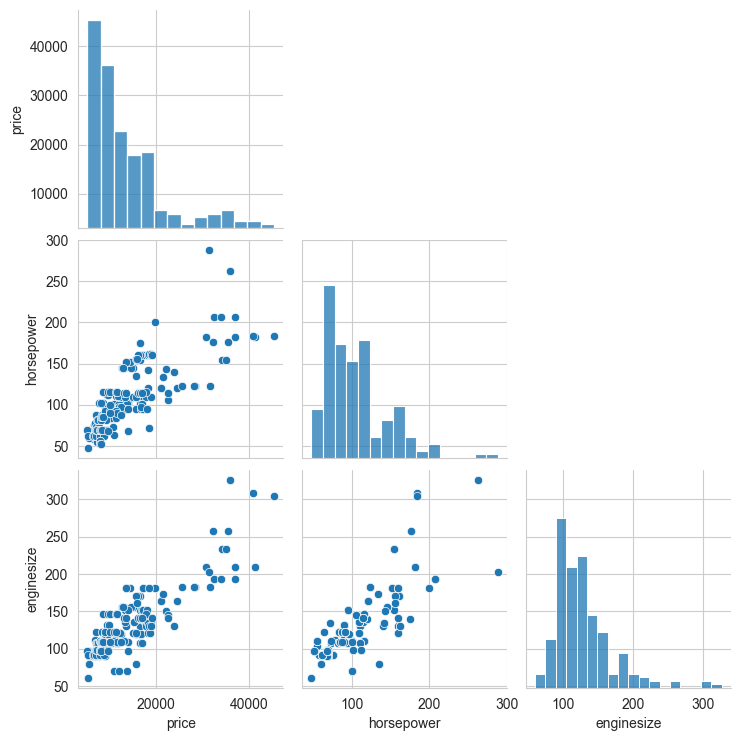

In [64]:
fig = sns.pairplot(df, vars=['price', 'horsepower', 'enginesize'])
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
  fig.axes[i, j].set_visible(False)
plt.show()

I will also show here the correlation between horsepower and enginesize:

In [65]:
correlation = df['horsepower'].corr(df['enginesize'])
print("Correlation between horsepower and enginesize:", correlation)
px.scatter(df, x='enginesize', y='horsepower', trendline='ols', hover_data=['CarName'], title='Engine Size vs Horsepower by Fuel Type').show()

Correlation between horsepower and enginesize: 0.8097686545377306


And finally the correlation between horsepower and price:

In [66]:
correlation = df['horsepower'].corr(df['price'])
print("Correlation between horsepower and price:", correlation)
px.scatter(df, x='horsepower', y='price', trendline='ols', hover_data=['CarName'], title='Horsepower vs Price').show()

Correlation between horsepower and price: 0.8081388225362215


From this we can clearly see the strong correlation between horsepower and enginesize, as well as their relation to price. The more horsepower and larger the engine size, the higher the price of the car. Therefore for further analysis I will focus on horsepower alone as it is the property that clearly measures the power of the engine.

### Horsepower and categorical variables
Here I will take a look at the relationship between horsepower and different categorical variables to see how we can improve car's horsepower with technology.

##### Horespower, number of cylinders and fuel type

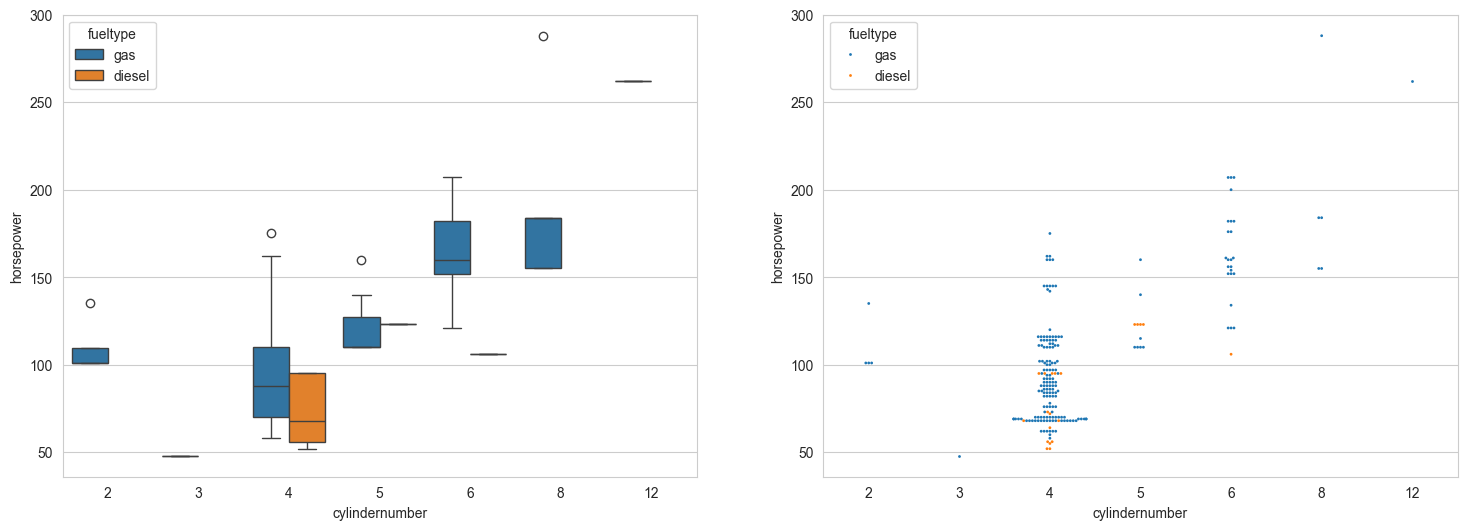

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.boxplot(data=df, x='cylindernumber', y='horsepower', hue='fueltype', ax=axes[0])
sns.swarmplot(data=df, x='cylindernumber', y='horsepower', hue='fueltype', ax=axes[1], size=2)
plt.show()

From this chart we can clearly see that cars with more cylinders usually have more horsepower, however it's not a set in stone rule. We can also see that diesel cars are often on the lower side of the price spectrum, even if they cost more on average.

##### Horsepower and engine type

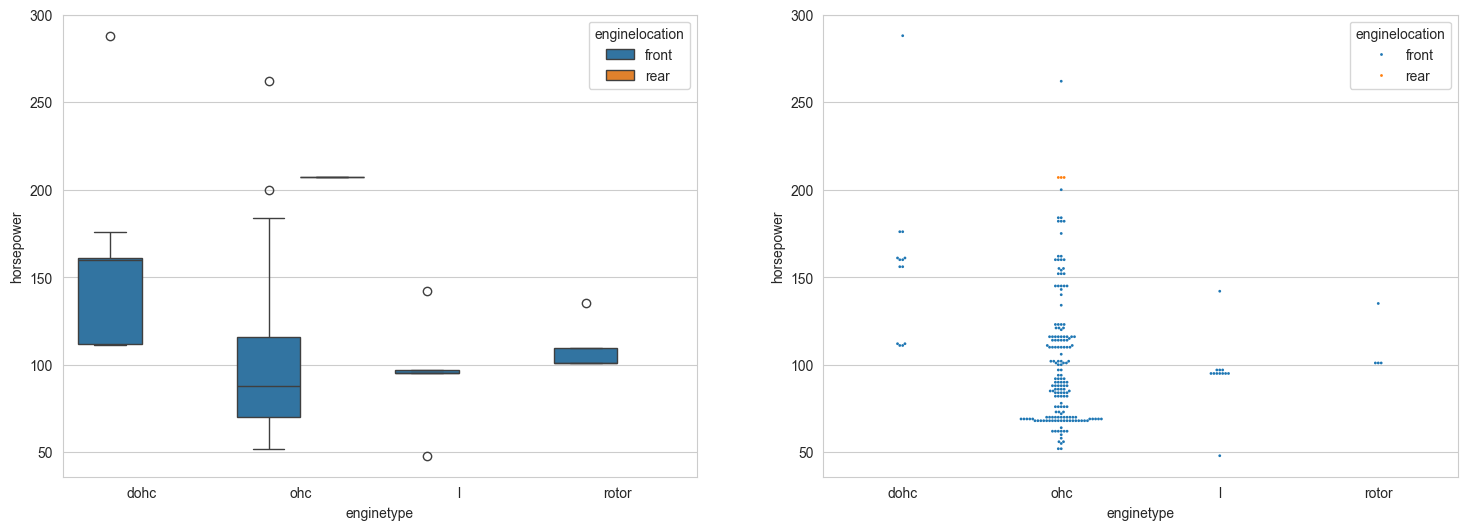

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.boxplot(data=df, x='enginetype', y='horsepower', hue='enginelocation', ax=axes[0])
sns.swarmplot(data=df, x='enginetype', y='horsepower', hue='enginelocation', ax=axes[1], size=2)
plt.show()

Here we can see that `dohc`, the newer technology, usually allows for more powerful engines. Also it is hard to say whether engine location has any effect since there are only 3 cars with rear engine.

##### Horsepower and other categories

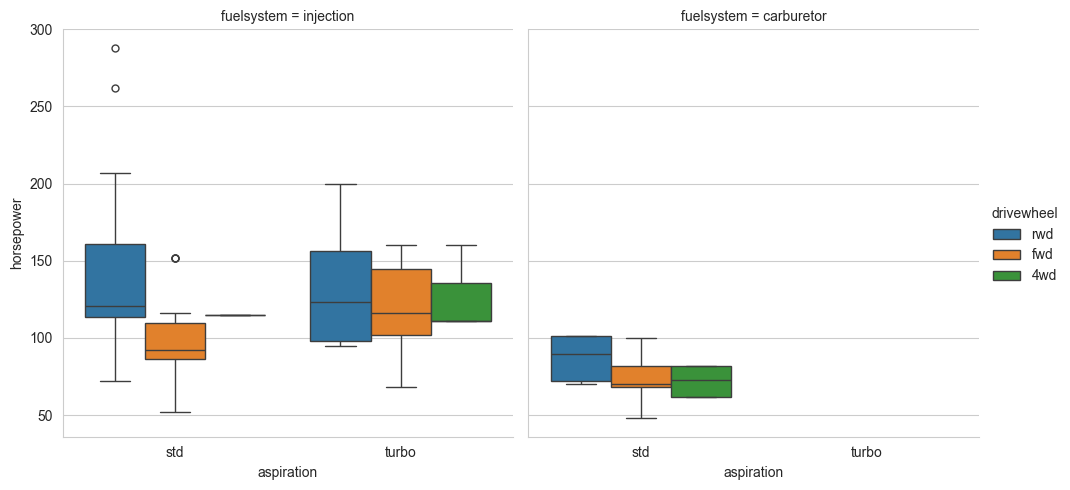

In [69]:
# Boxplot: horsepower by aspiration, colored by drivewheel, faceted by fuelsystem
sns.catplot(
    data=df,
    x='aspiration',
    y='horsepower',
    hue='drivewheel',
    col='fuelsystem',
    kind='box',
    height=5,
    aspect=1
)
plt.show()

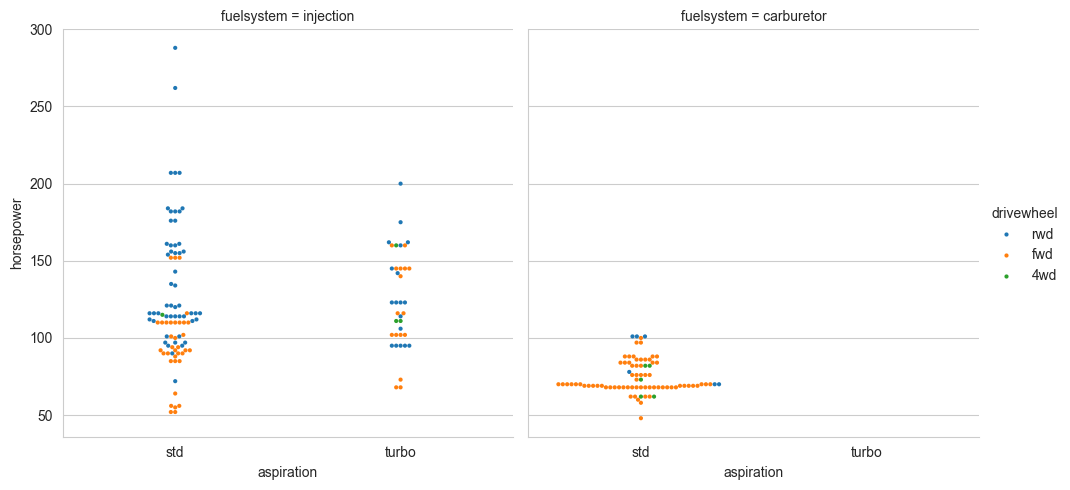

In [70]:
sns.catplot(
    data=df,
    x='aspiration',
    y='horsepower',
    hue='drivewheel',
    col='fuelsystem',
    kind='swarm',
    height=5,
    aspect=1,
    size=3
)
plt.show()

This reveals few things:
- as expected injection (especially `mpfi`) is a far superior technology.
- It is clear that **Rear-Wheel Drive** results in more horsepower on average than the Front-Wheel Drive, although nothing definitive can be said about the Four-Wheel Drive because of the scarcity of data.
- Turbo aspiration should result in higher horsepower on average, although there are clearly some outliers with standard aspiration and very high horsepower. The relationship between these two variables is not as clear.

### Car dimensions, weight and price
Here the relationship will probably be obvious: the more materials you use to build a car the more expensive it will be.

##### Weight and price

Correlation between curbweight and price: 0.835304879337296


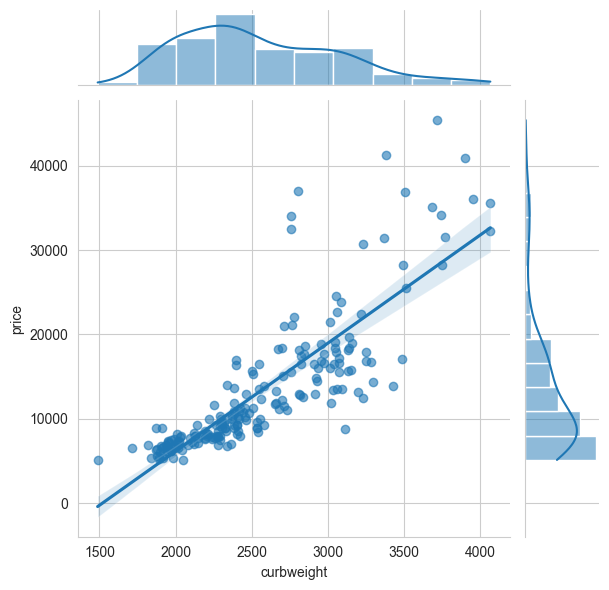

In [71]:
correlation = df['curbweight'].corr(df['price'])
print("Correlation between curbweight and price:", correlation)
sns.jointplot(data=df, x='curbweight', y='price', kind='reg', scatter_kws={'alpha':0.6})
plt.show()

There is a clear correlation between car weight and price.

##### Dimensions and price
Since making a bigger car require more materials it is expected that larger cars should be more expensive. This can be summarized nicely in a 3D plot:

In [72]:
fig = px.scatter_3d(df, x='carlength', y='carwidth', z='carheight', color='price', title='3D Scatter Plot of Car Dimensions and Price')
fig.show()

Since this graph is really data-dense and might be hard to read, let's see the scatter plot with the correlation for each of car's dimension:

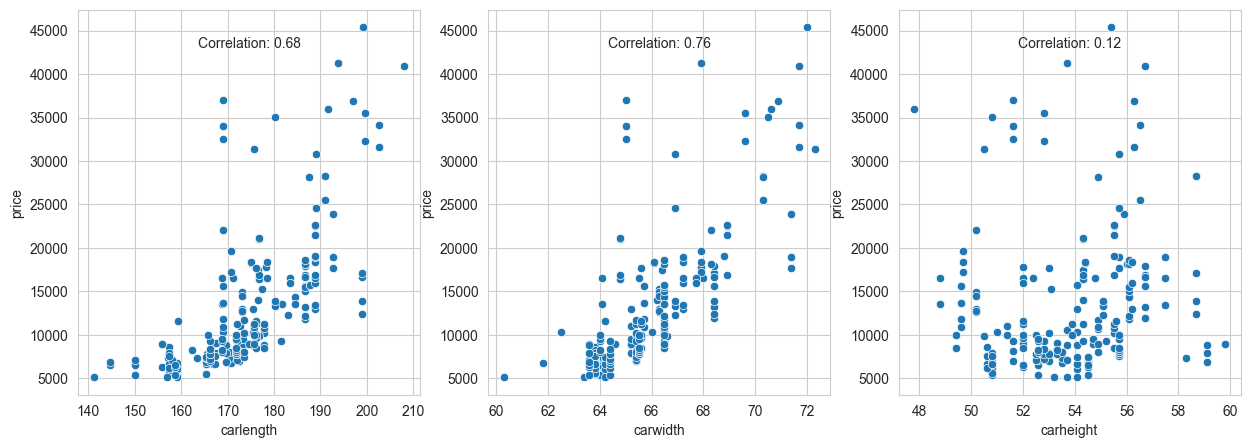

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# plots
sns.scatterplot(data=df, x='carlength', y='price', ax=axes[0])
sns.scatterplot(data=df, x='carwidth', y='price', ax=axes[1])
sns.scatterplot(data=df, x='carheight', y='price', ax=axes[2])

#correlations
lengthcorr = df['carlength'].corr(df['price'])
widthcorr = df['carwidth'].corr(df['price'])
heightcorr = df['carheight'].corr(df['price'])

# add correlation text
axes[0].text(0.5, 0.9, f'Correlation: {lengthcorr:.2f}', transform=axes[0].transAxes, ha='center')
axes[1].text(0.5, 0.9, f'Correlation: {widthcorr:.2f}', transform=axes[1].transAxes, ha='center')
axes[2].text(0.5, 0.9, f'Correlation: {heightcorr:.2f}', transform=axes[2].transAxes, ha='center')

plt.show()

Here you can see that the correlation is actually not that clear, especially in the case of car height. This has probably something to do with the car body. Car length and even car width also show significantly lower correlation with car price, than the weight or horsepower does.

### Fuel efficiency and price
Finally we will take a look at the relationship between city and highway mpg, and price:

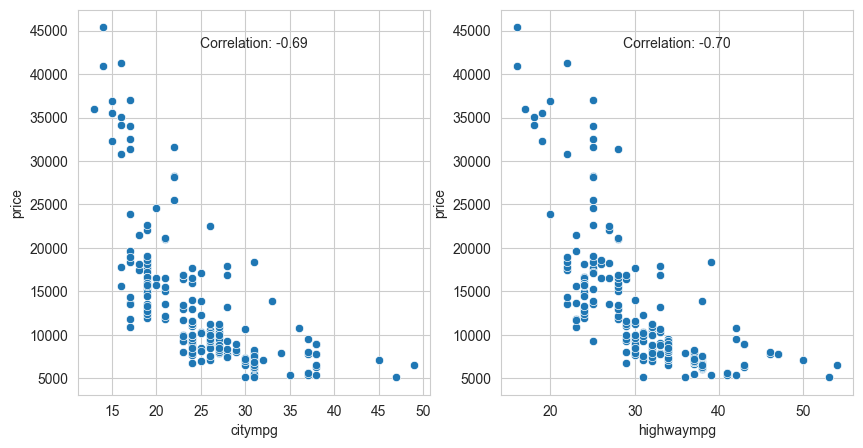

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=df, x='citympg', y='price', ax=axes[0])
sns.scatterplot(data=df, x='highwaympg', y='price', ax=axes[1])

city_corr = df['citympg'].corr(df['price'])
highway_corr = df['highwaympg'].corr(df['price'])

axes[0].text(0.5, 0.9, f'Correlation: {city_corr:.2f}', transform=axes[0].transAxes, ha='center')
axes[1].text(0.5, 0.9, f'Correlation: {highway_corr:.2f}', transform=axes[1].transAxes, ha='center')

plt.show()

Here we can also see a moderate correlation (0.7) for both signifying that higher fuel efficiency tends to be a feature of more expensive cars. You can also see that the most expensive cars are concentrated on the left high efficiency quadrant, but not all highly efficient cars are necessary very expensive.

## Conclusion

### Summary
We can deduce several conclusions from these findings:
- Most car prices are concentrated at the lower end, with a few premium models as outliers.
- Technical and mechanical features such as diesel fuel, turbo aspiration, rear-wheel drive, rear engine location, DOHC engine type, and fuel injection systems are associated with higher average prices, although some of these values such as engine location are ambiguous due to the scarcity of data.
- There is a strong positive correlation between horsepower, engine size, and price—cars with more powerful and larger engines tend to be more expensive.
- Rear-wheel drive and turbo aspiration generally result in higher horsepower, but there are exceptions and outliers.
- Newer technologies (like multi-port fuel injection and DOHC engines) are linked to higher performance and price.
- Some car bodies seem to come at premium price although the more expensive ones are relatively rare
- Car weight is strongly correlated with price, while car length and width show weaker correlations, and car height has little effect.
- Higher fuel efficiency (city and highway mpg) is moderately correlated with higher price, suggesting that more expensive cars often feature better efficiency.
- Some categorical features (like engine type and drive wheel) interact with performance and price, but data scarcity in certain categories limits definitive conclusions.

Overall, the analysis shows that both technical specifications such as horsepower, and categorical features play important roles in determining car price, with performance, technology, and brand prestige being key drivers of higher prices.

### Recommendations

- in order to compete on the market and maybe sell cars at premium focus on providing the highest horsepower and engine size.
- make sure to implement newer technologies such as multi-port fuel injection and DOHC.
- use rear-wheel drive if possible
- Cars don't necessarily have to be very large to be expensive, but if you want to sell more expensive cars make sure to not make them too small
- Higher fuel efficiency is important but not necessary make or break factor for consumers